In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
## 1 point
diab_df = pd.read_csv('diabetes.csv')
diab_df.head()
## ToDo: read the csv file into a dataframe and show the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## 3 points
X = diab_df[diab_df.columns.drop('Outcome')]
y = diab_df['Outcome']
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X,y)
print("Coefficients: {}".format(log_reg.coef_[0]))
print("Intercept: {}".format(log_reg.intercept_[0]))
## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients

Coefficients: [ 1.22389116e-01  3.51126097e-02 -1.33102008e-02  7.88456442e-04
 -1.17435296e-03  8.96302569e-02  8.67609737e-01  1.50051246e-02]
Intercept: -8.364227782850977


In [5]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)

C:\Users\Keyon\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Keyon\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)



{'w0': array(-8.40415296), 'w1': array(0.12318162), 'w2': array(0.03516111), 'w3': array(-0.01329553), 'w4': array(0.00061659), 'w5': array(-0.00119136), 'w6': array(0.08969397), 'w7': array(0.94517165), 'w8': array(0.01487179)}


The code starts by representing the weights corresponding to each of our features as gaussian random variables with mean of 0 and standard deviation of 100.
The Bernoulli distributions is used here for the likelihood. 
The pm.invlogit(linreg) expression is a transformation of the values of linreg to the interval (0,1) through the function $\frac{1}{1+e^{-linreg}}$.
The map_est gives the maximum likelihood from the Bernoulli distribution.

C:\Users\Keyon\AppData\Local\Temp/ipykernel_24164/4290752583.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(samples, chains=nchains, tune=tune, step=pm.Metropolis())
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 5561 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Keyon\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w0'}>,
        <AxesSubplot:title={'center':'w1'}>,
        <AxesSubplot:title={'center':'w2'}>],
       [<AxesSubplot:title={'center':'w3'}>,
        <AxesSubplot:title={'center':'w4'}>,
        <AxesSubplot:title={'center':'w5'}>],
       [<AxesSubplot:title={'center':'w6'}>,
        <AxesSubplot:title={'center':'w7'}>,
        <AxesSubplot:title={'center':'w8'}>]], dtype=object)

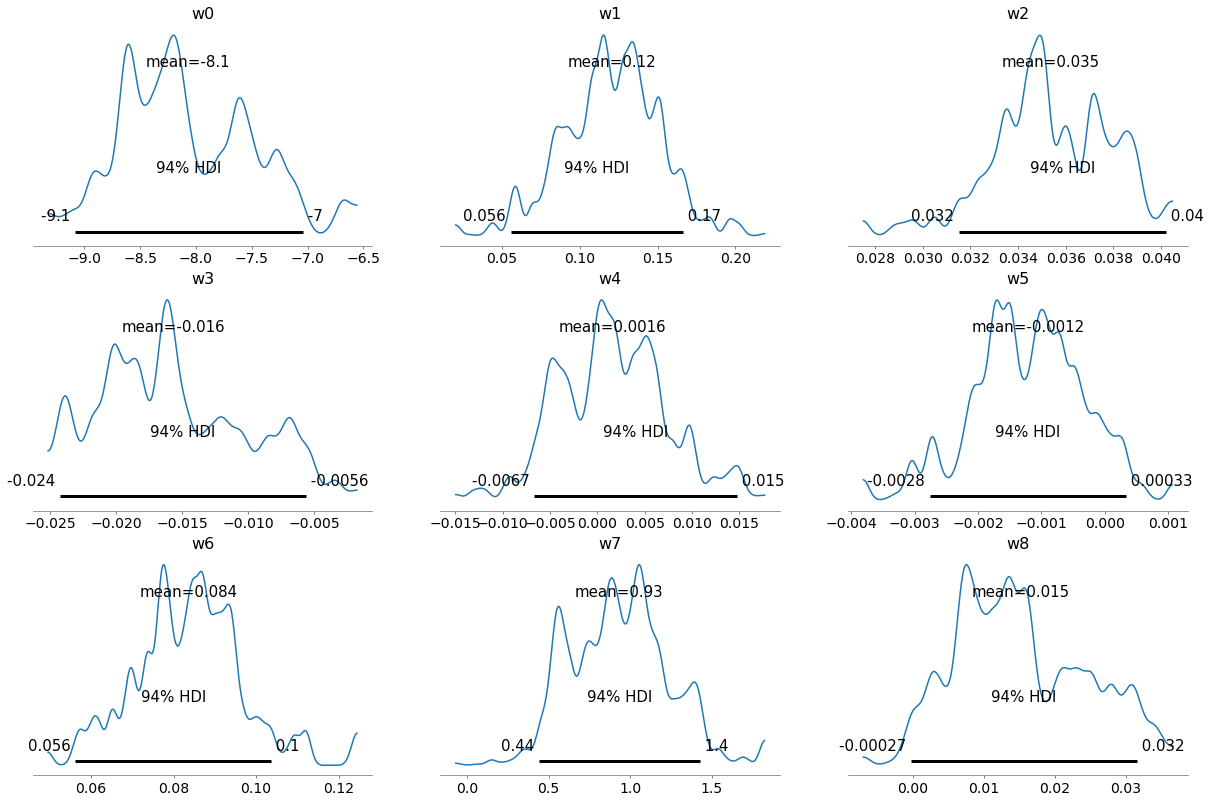

In [9]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    samples = 400
    nchains = 4
    tune = 1000
    trace = pm.sample(samples, chains=nchains, tune=tune, step=pm.Metropolis())
## Explain the output of the plot 
az.plot_posterior(trace)

The plots represent the posterior probabilites of each of the features in our data taking some corresponding value of $w_n$. The means for each $w_n$ graph represent the most likely value for the weight of the corresponding feature in the data.

https://github.com/Kayday271